In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from modAL.models import ActiveLearner
from sklearn.utils import shuffle
from copy import deepcopy
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from modAL.uncertainty import uncertainty_sampling, margin_sampling, entropy_sampling, classifier_uncertainty, classifier_margin

# Iris dataset

In [2]:
# loading the iris dataset
iris = load_iris()

In [3]:
X_raw = iris['data']
y_raw = iris['target']

In [4]:
# print(X_raw, "\n", y_raw)

In [5]:
X_train,X_test,y_train,y_test=train_test_split(X_raw,y_raw,test_size=0.1, random_state=42,shuffle=True)
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.4, random_state=42,shuffle=True)

In [6]:
# Isolate our examples for our labeled dataset.
n_labeled_examples = X_raw.shape[0]
training_indices = np.random.randint(low=0, high=n_labeled_examples + 1, size=3)

# X_train = X_raw[training_indices]
# y_train = y_raw[training_indices]


X_pool = deepcopy(X_val)
y_pool = deepcopy(y_val)
# Isolate the non-training examples we'll be querying.
# X_pool = np.delete(X_raw, training_indices, axis=0)
# y_pool = np.delete(y_raw, training_indices, axis=0)

# Random_Sampling

In [7]:
def random_sampling(classifier, X_pool):
    n_samples = len(X_pool)
    query_idx = np.random.choice(range(n_samples))
    return query_idx, X_pool[query_idx] 

learner = ActiveLearner(
    estimator=RandomForestClassifier(),
    query_strategy=random_sampling,
    X_training=X_train, y_training=y_train
)

In [8]:
y_predict = learner.predict(X_raw)
print(accuracy_score(y_predict , y_raw))

0.98


In [9]:
type(X_train)

numpy.ndarray

In [10]:
print(learner.score(X_train , y_train))

1.0


In [11]:
X_pool.shape[0]

54

In [12]:
unqueried_score = learner.score(X_raw, y_raw)

In [13]:
N_QUERIES = X_pool.shape[0]
performance_history = [unqueried_score]


# Allow our model to query our unlabeled dataset for the most
# informative points according to our query strategy (uncertainty sampling).
for index in range(N_QUERIES):
    query_index, query_instance = learner.query(X_pool)

    # Teach our ActiveLearner model the record it has requested.
    X, y = X_pool[query_index].reshape(1, -1), y_pool[query_index].reshape(1, )
    learner.teach(X=X, y=y)
    print(learner.score(X_train , y_train))


#     X_train= np.append(X_train, X)
#     y_train= np.append(y_train, y)

#     traning_score = learner.score(np.array(X_train_lst) , np.array(y_train_lst))
    # Remove the queried instance from the unlabeled pool.
    X_pool, y_pool = np.delete(X_pool, query_index, axis=0), np.delete(y_pool, query_index)

    # Calculate and report our model's accuracy.
    model_accuracy = learner.score(X_raw, y_raw)
    print('Test Accuracy after query {n}: {acc:0.4f}'.format(n=index + 1, acc=model_accuracy))
#     print('Traning Accuracy after query {n}: {acc:0.4f}'.format(n=index + 1, acc=traning_score))


    # Save our model's performance for plotting.
    performance_history.append(model_accuracy)

1.0
Test Accuracy after query 1: 0.9800
1.0
Test Accuracy after query 2: 0.9800
1.0
Test Accuracy after query 3: 0.9800
1.0
Test Accuracy after query 4: 0.9800
1.0
Test Accuracy after query 5: 0.9800
1.0
Test Accuracy after query 6: 0.9800
1.0
Test Accuracy after query 7: 0.9800
1.0
Test Accuracy after query 8: 0.9800
1.0
Test Accuracy after query 9: 0.9800
1.0
Test Accuracy after query 10: 0.9800
1.0
Test Accuracy after query 11: 0.9800
1.0
Test Accuracy after query 12: 0.9800
1.0
Test Accuracy after query 13: 0.9800
1.0
Test Accuracy after query 14: 0.9800
1.0
Test Accuracy after query 15: 0.9800
1.0
Test Accuracy after query 16: 0.9800
1.0
Test Accuracy after query 17: 0.9800
1.0
Test Accuracy after query 18: 0.9800
1.0
Test Accuracy after query 19: 0.9800
1.0
Test Accuracy after query 20: 0.9800
1.0
Test Accuracy after query 21: 0.9800
1.0
Test Accuracy after query 22: 0.9800
1.0
Test Accuracy after query 23: 0.9800
1.0
Test Accuracy after query 24: 0.9800
1.0
Test Accuracy after q

In [14]:
# Isolate our examples for our labeled dataset.
n_labeled_examples = X_raw.shape[0]
training_indices = np.random.randint(low=0, high=n_labeled_examples + 1, size=3)

X_train = X_raw[training_indices]
y_train = y_raw[training_indices]


# X_pool = deepcopy(X_val)
# y_pool = deepcopy(y_val)
# Isolate the non-training examples we'll be querying.
X_pool = np.delete(X_raw, training_indices, axis=0)
y_pool = np.delete(y_raw, training_indices, axis=0)

# uncertainty_sampling

In [15]:
# Specify our core estimator along with it is active learning model.
knn = KNeighborsClassifier(n_neighbors=3)

learner = ActiveLearner(estimator=knn, query_strategy=uncertainty_sampling, X_training=X_train, y_training=y_train)

In [16]:
y_predict = learner.predict(X_raw)
print(accuracy_score(y_predict , y_raw))

0.3333333333333333


In [17]:
unqueried_score = learner.score(X_raw, y_raw)

In [18]:
N_QUERIES = 20
performance_history = [unqueried_score]

# Allow our model to query our unlabeled dataset for the most
# informative points according to our query strategy (uncertainty sampling).
for index in range(N_QUERIES):
    query_index, query_instance = learner.query(X_pool)

    # Teach our ActiveLearner model the record it has requested.
    X, y = X_pool[query_index].reshape(1, -1), y_pool[query_index].reshape(1, )
    learner.teach(X=X, y=y)

    # Remove the queried instance from the unlabeled pool.
    X_pool, y_pool = np.delete(X_pool, query_index, axis=0), np.delete(y_pool, query_index)

    # Calculate and report our model's accuracy.
    model_accuracy = learner.score(X_raw, y_raw)
    print('Accuracy after query {n}: {acc:0.4f}'.format(n=index + 1, acc=model_accuracy))

    # Save our model's performance for plotting.
    performance_history.append(model_accuracy)

Accuracy after query 1: 0.3333
Accuracy after query 2: 0.6667
Accuracy after query 3: 0.6667
Accuracy after query 4: 0.6667
Accuracy after query 5: 0.8400
Accuracy after query 6: 0.8400
Accuracy after query 7: 0.8800
Accuracy after query 8: 0.9467
Accuracy after query 9: 0.9133
Accuracy after query 10: 0.8933
Accuracy after query 11: 0.8933
Accuracy after query 12: 0.8933
Accuracy after query 13: 0.8933
Accuracy after query 14: 0.8867
Accuracy after query 15: 0.8867
Accuracy after query 16: 0.8733
Accuracy after query 17: 0.8600
Accuracy after query 18: 0.9067
Accuracy after query 19: 0.9333
Accuracy after query 20: 0.9333


# margin_sampling

In [19]:
learner = ActiveLearner(
    estimator=RandomForestClassifier(),
    query_strategy=margin_sampling,
    X_training=X_train, y_training=y_train
)

In [20]:
y_predict = learner.predict(X_raw)
print(accuracy_score(y_predict , y_raw))

0.3333333333333333


In [21]:
unqueried_score = learner.score(X_raw, y_raw)

In [22]:
N_QUERIES = 20
performance_history = [unqueried_score]

# Allow our model to query our unlabeled dataset for the most
# informative points according to our query strategy (uncertainty sampling).
for index in range(N_QUERIES):
    query_index, query_instance = learner.query(X_pool)

    # Teach our ActiveLearner model the record it has requested.
    X, y = X_pool[query_index].reshape(1, -1), y_pool[query_index].reshape(1, )
    learner.teach(X=X, y=y)

    # Remove the queried instance from the unlabeled pool.
    X_pool, y_pool = np.delete(X_pool, query_index, axis=0), np.delete(y_pool, query_index)

    # Calculate and report our model's accuracy.
    model_accuracy = learner.score(X_raw, y_raw)
    print('Accuracy after query {n}: {acc:0.4f}'.format(n=index + 1, acc=model_accuracy))

    # Save our model's performance for plotting.
    performance_history.append(model_accuracy)

Accuracy after query 1: 0.5933
Accuracy after query 2: 0.6667
Accuracy after query 3: 0.7933
Accuracy after query 4: 0.8067
Accuracy after query 5: 0.7733
Accuracy after query 6: 0.8867
Accuracy after query 7: 0.9133
Accuracy after query 8: 0.8933
Accuracy after query 9: 0.9333
Accuracy after query 10: 0.9467
Accuracy after query 11: 0.9600
Accuracy after query 12: 0.9733
Accuracy after query 13: 0.9733
Accuracy after query 14: 0.9600
Accuracy after query 15: 0.9733
Accuracy after query 16: 0.9800
Accuracy after query 17: 0.9667
Accuracy after query 18: 0.9733
Accuracy after query 19: 0.9733
Accuracy after query 20: 0.9733


# entropy_sampling

In [23]:
learner = ActiveLearner(
    estimator=RandomForestClassifier(),
    query_strategy=entropy_sampling,
    X_training=X_train, y_training=y_train
)

In [24]:
y_predict = learner.predict(X_raw)
print(accuracy_score(y_predict , y_raw))

0.3333333333333333


In [25]:
unqueried_score = learner.score(X_raw, y_raw)

In [26]:
N_QUERIES = 20
performance_history = [unqueried_score]

# Allow our model to query our unlabeled dataset for the most
# informative points according to our query strategy (uncertainty sampling).
for index in range(N_QUERIES):
    query_index, query_instance = learner.query(X_pool)

    # Teach our ActiveLearner model the record it has requested.
    X, y = X_pool[query_index].reshape(1, -1), y_pool[query_index].reshape(1, )
    learner.teach(X=X, y=y)

    # Remove the queried instance from the unlabeled pool.
    X_pool, y_pool = np.delete(X_pool, query_index, axis=0), np.delete(y_pool, query_index)

    # Calculate and report our model's accuracy.
    model_accuracy = learner.score(X_raw, y_raw)
    print('Accuracy after query {n}: {acc:0.4f}'.format(n=index + 1, acc=model_accuracy))

    # Save our model's performance for plotting.
    performance_history.append(model_accuracy)

Accuracy after query 1: 0.6667
Accuracy after query 2: 0.6667
Accuracy after query 3: 0.7467
Accuracy after query 4: 0.8333
Accuracy after query 5: 0.8467
Accuracy after query 6: 0.8933
Accuracy after query 7: 0.9467
Accuracy after query 8: 0.9467
Accuracy after query 9: 0.9467
Accuracy after query 10: 0.9533
Accuracy after query 11: 0.9600
Accuracy after query 12: 0.9600
Accuracy after query 13: 0.9600
Accuracy after query 14: 0.9600
Accuracy after query 15: 0.9600
Accuracy after query 16: 0.9600
Accuracy after query 17: 0.9600
Accuracy after query 18: 0.9533
Accuracy after query 19: 0.9600
Accuracy after query 20: 0.9600


# Query-By-Committee with PCA

In [27]:
y_predict = learner.predict(X_raw)
print(accuracy_score(y_predict , y_raw))

0.96


In [28]:
# apply PCA
pca = PCA(n_components=2)
X_transformed = pca.fit_transform(X_raw)

In [29]:
knn = KNeighborsClassifier(n_neighbors=3)

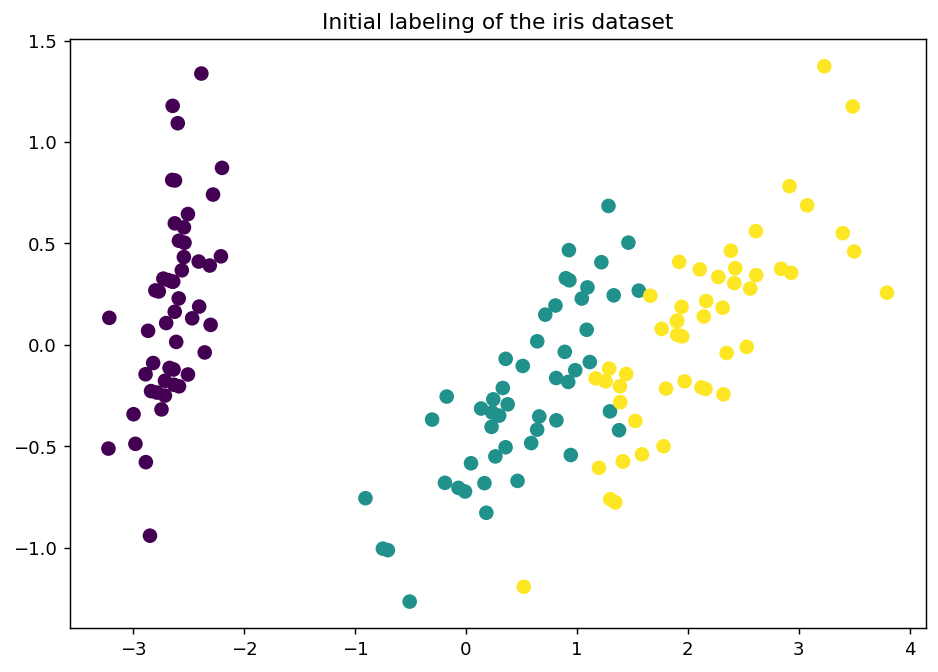

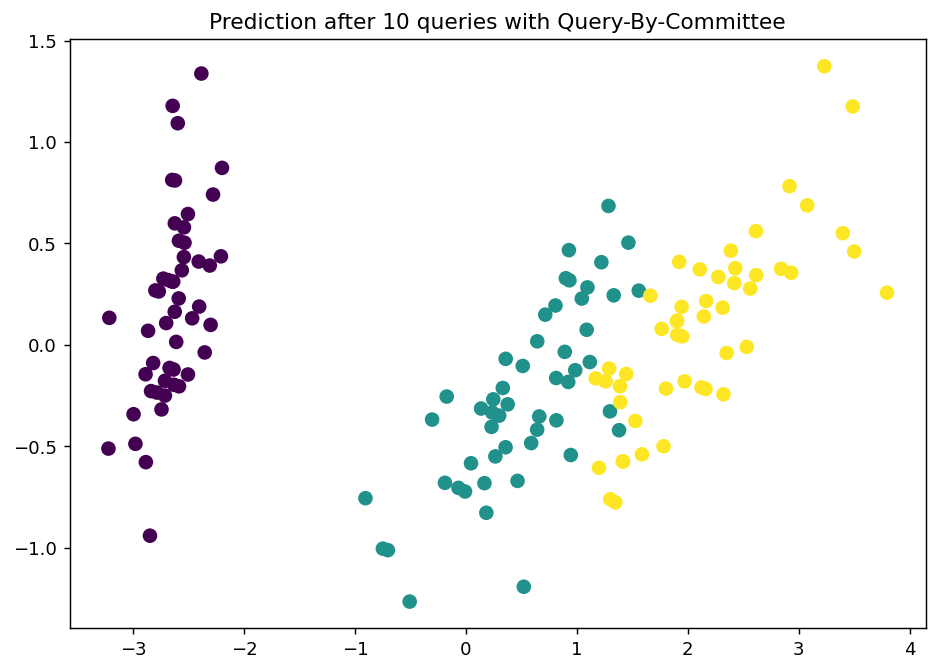

Accuracy after active learning:99.33%


In [32]:
from modAL.models import Committee
# create a committee of three classifiers
committee = Committee(
    learner_list=[ActiveLearner(
        estimator=knn,
        X_training=X_transformed,
        y_training=y_raw,
    ) for _ in range(3)],
)

# select the next samples to be labeled
n_queries = 10
X_pool = X_transformed
y_pool = y_raw
for i in range(n_queries):
    query_idx, _ = committee.query(X_pool)
    committee.teach(
        X=X_pool[query_idx].reshape(1, -1),
        y=y_pool[query_idx].reshape(1, )
    )
    X_pool = np.delete(X_pool, query_idx, axis=0)
    y_pool = np.delete(y_pool, query_idx)

# plot the results
_, ax = plt.subplots(figsize=(8.5, 6), dpi=130)
ax.scatter(*X_transformed.T, c=y_raw, s=50)
ax.set_title('Initial labeling of the iris dataset')
plt.show()

_, ax = plt.subplots(figsize=(8.5, 6), dpi=130)
prediction = committee.predict(X_transformed)
ax.scatter(*X_transformed.T, c=prediction, s=50)
ax.set_title('Prediction after 10 queries with Query-By-Committee')
plt.show()


# calculate accuracy
accuracy = accuracy_score(y_raw, prediction)

print('Accuracy after active learning:{:.2f}%'.format(accuracy*100))


# Random Sampling with PCA

In [33]:
from sklearn.svm import SVC
# apply PCA
pca = PCA(n_components=2)
X_transformed = pca.fit_transform(X_raw)

# split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y_raw, test_size=0.2, random_state=42)

# initialize the SVM classifier
svm = SVC(kernel='linear', C=1, probability=True)

# create the ActiveLearner object with random sampling
learner = ActiveLearner(
    estimator=svm,
    query_strategy=uncertainty_sampling,
    X_training=X_train,
    y_training=y_train
)

# train the model
n_queries = 10
for idx in range(n_queries):
    query_idx, query_instance = learner.query(X_train)
    X_new, y_new = X_train[query_idx].reshape(1, -1), y_train[query_idx].reshape(1, )
    learner.teach(X=X_new, y=y_new)
    X_train = np.delete(X_train, query_idx, axis=0)
    y_train = np.delete(y_train, query_idx)

# test the model
y_pred = learner.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy on test set: {:.2f}%'.format(accuracy*100))

Accuracy on test set: 96.67%


# Wine dataset

In [34]:
from sklearn.datasets import load_wine
X_raw1, y_raw1 = load_wine(return_X_y=True)

In [35]:
# Isolate our examples for our labeled dataset.
n_labeled_examples = X_raw1.shape[0]
training_indices = np.random.randint(low=0, high=n_labeled_examples + 1, size=3)

X_train = X_raw1[training_indices]
y_train = y_raw1[training_indices]

# Isolate the non-training examples we'll be querying.
X_pool = np.delete(X_raw1, training_indices, axis=0)
y_pool = np.delete(y_raw1, training_indices, axis=0)

# uncertainty_sampling

In [36]:
# Specify our core estimator along with it is active learning model.
knn = KNeighborsClassifier(n_neighbors=3)

learner = ActiveLearner(estimator=knn, query_strategy=uncertainty_sampling, X_training=X_train, y_training=y_train)

In [37]:
y_predict = learner.predict(X_raw1)
print(accuracy_score(y_predict , y_raw1))

0.398876404494382


In [38]:
unqueried_score = learner.score(X_raw1, y_raw1)

In [39]:
N_QUERIES = 20
performance_history = [unqueried_score]

# Allow our model to query our unlabeled dataset for the most
# informative points according to our query strategy (uncertainty sampling).
for index in range(N_QUERIES):
    query_index, query_instance = learner.query(X_pool)

    # Teach our ActiveLearner model the record it has requested.
    X, y = X_pool[query_index].reshape(1, -1), y_pool[query_index].reshape(1, )
    learner.teach(X=X, y=y)

    # Remove the queried instance from the unlabeled pool.
    X_pool, y_pool = np.delete(X_pool, query_index, axis=0), np.delete(y_pool, query_index)

    # Calculate and report our model's accuracy.
    model_accuracy = learner.score(X_raw1, y_raw1)
    print('Accuracy after query {n}: {acc:0.4f}'.format(n=index + 1, acc=model_accuracy))

    # Save our model's performance for plotting.
    performance_history.append(model_accuracy)

Accuracy after query 1: 0.6742
Accuracy after query 2: 0.6742
Accuracy after query 3: 0.6742
Accuracy after query 4: 0.6067
Accuracy after query 5: 0.5843
Accuracy after query 6: 0.5843
Accuracy after query 7: 0.6348
Accuracy after query 8: 0.6573
Accuracy after query 9: 0.6742
Accuracy after query 10: 0.6854
Accuracy after query 11: 0.6854
Accuracy after query 12: 0.6854
Accuracy after query 13: 0.6854
Accuracy after query 14: 0.6910
Accuracy after query 15: 0.6910
Accuracy after query 16: 0.6910
Accuracy after query 17: 0.6910
Accuracy after query 18: 0.6910
Accuracy after query 19: 0.6910
Accuracy after query 20: 0.6910


# Random Sampling

In [40]:
def random_sampling(classifier, X_pool):
    n_samples = len(X_pool)
    query_idx = np.random.choice(range(n_samples))
    return query_idx, X_pool[query_idx]

learner = ActiveLearner(
    estimator=RandomForestClassifier(),
    query_strategy=random_sampling,
    X_training=X_train, y_training=y_train
)

In [41]:
y_predict = learner.predict(X_raw1)
print(accuracy_score(y_predict , y_raw1))

0.6235955056179775


In [42]:
unqueried_score = learner.score(X_raw1, y_raw1)

In [43]:
N_QUERIES = 20
performance_history = [unqueried_score]

# Allow our model to query our unlabeled dataset for the most
# informative points according to our query strategy (uncertainty sampling).
for index in range(N_QUERIES):
    query_index, query_instance = learner.query(X_pool)

    # Teach our ActiveLearner model the record it has requested.
    X, y = X_pool[query_index].reshape(1, -1), y_pool[query_index].reshape(1, )
    learner.teach(X=X, y=y)

    # Remove the queried instance from the unlabeled pool.
    X_pool, y_pool = np.delete(X_pool, query_index, axis=0), np.delete(y_pool, query_index)

    # Calculate and report our model's accuracy.
    model_accuracy = learner.score(X_raw1, y_raw1)
    print('Accuracy after query {n}: {acc:0.4f}'.format(n=index + 1, acc=model_accuracy))

    # Save our model's performance for plotting.
    performance_history.append(model_accuracy)

Accuracy after query 1: 0.6348
Accuracy after query 2: 0.7528
Accuracy after query 3: 0.8315
Accuracy after query 4: 0.8315
Accuracy after query 5: 0.8371
Accuracy after query 6: 0.9045
Accuracy after query 7: 0.9101
Accuracy after query 8: 0.9213
Accuracy after query 9: 0.9326
Accuracy after query 10: 0.9551
Accuracy after query 11: 0.9382
Accuracy after query 12: 0.9326
Accuracy after query 13: 0.8876
Accuracy after query 14: 0.9270
Accuracy after query 15: 0.9270
Accuracy after query 16: 0.9494
Accuracy after query 17: 0.9551
Accuracy after query 18: 0.9438
Accuracy after query 19: 0.9607
Accuracy after query 20: 0.9494


# margin_sampling

In [44]:
learner = ActiveLearner(
    estimator=RandomForestClassifier(),
    query_strategy=margin_sampling,
    X_training=X_train, y_training=y_train
)

In [45]:
y_predict = learner.predict(X_raw1)
print(accuracy_score(y_predict , y_raw1))

0.6685393258426966


In [46]:
unqueried_score = learner.score(X_raw1, y_raw1)

In [47]:
N_QUERIES = 20
performance_history = [unqueried_score]

# Allow our model to query our unlabeled dataset for the most
# informative points according to our query strategy (uncertainty sampling).
for index in range(N_QUERIES):
    query_index, query_instance = learner.query(X_pool)

    # Teach our ActiveLearner model the record it has requested.
    X, y = X_pool[query_index].reshape(1, -1), y_pool[query_index].reshape(1, )
    learner.teach(X=X, y=y)

    # Remove the queried instance from the unlabeled pool.
    X_pool, y_pool = np.delete(X_pool, query_index, axis=0), np.delete(y_pool, query_index)

    # Calculate and report our model's accuracy.
    model_accuracy = learner.score(X_raw1, y_raw1)
    print('Accuracy after query {n}: {acc:0.4f}'.format(n=index + 1, acc=model_accuracy))

    # Save our model's performance for plotting.
    performance_history.append(model_accuracy)

Accuracy after query 1: 0.6798
Accuracy after query 2: 0.6910
Accuracy after query 3: 0.6966
Accuracy after query 4: 0.7022
Accuracy after query 5: 0.6685
Accuracy after query 6: 0.6910
Accuracy after query 7: 0.7079
Accuracy after query 8: 0.7135
Accuracy after query 9: 0.6910
Accuracy after query 10: 0.7697
Accuracy after query 11: 0.7697
Accuracy after query 12: 0.7697
Accuracy after query 13: 0.9213
Accuracy after query 14: 0.9607
Accuracy after query 15: 0.9775
Accuracy after query 16: 0.9775
Accuracy after query 17: 0.9775
Accuracy after query 18: 0.9831
Accuracy after query 19: 0.9775
Accuracy after query 20: 0.9944


# entropy_sampling

In [48]:
learner = ActiveLearner(
    estimator=RandomForestClassifier(),
    query_strategy=entropy_sampling,
    X_training=X_train, y_training=y_train
)

In [49]:
y_predict = learner.predict(X_raw1)
print(accuracy_score(y_predict , y_raw1))

0.6629213483146067


In [50]:
unqueried_score = learner.score(X_raw1, y_raw1)

In [51]:
N_QUERIES = 20
performance_history = [unqueried_score]

# Allow our model to query our unlabeled dataset for the most
# informative points according to our query strategy (uncertainty sampling).
for index in range(N_QUERIES):
    query_index, query_instance = learner.query(X_pool)

    # Teach our ActiveLearner model the record it has requested.
    X, y = X_pool[query_index].reshape(1, -1), y_pool[query_index].reshape(1, )
    learner.teach(X=X, y=y)

    # Remove the queried instance from the unlabeled pool.
    X_pool, y_pool = np.delete(X_pool, query_index, axis=0), np.delete(y_pool, query_index)

    # Calculate and report our model's accuracy.
    model_accuracy = learner.score(X_raw1, y_raw1)
    print('Accuracy after query {n}: {acc:0.4f}'.format(n=index + 1, acc=model_accuracy))

    # Save our model's performance for plotting.
    performance_history.append(model_accuracy)

Accuracy after query 1: 0.6011
Accuracy after query 2: 0.7135
Accuracy after query 3: 0.8427
Accuracy after query 4: 0.8989
Accuracy after query 5: 0.8708
Accuracy after query 6: 0.8989
Accuracy after query 7: 0.8933
Accuracy after query 8: 0.8764
Accuracy after query 9: 0.8764
Accuracy after query 10: 0.8820
Accuracy after query 11: 0.9551
Accuracy after query 12: 0.9719
Accuracy after query 13: 0.9494
Accuracy after query 14: 0.9494
Accuracy after query 15: 0.9607
Accuracy after query 16: 0.9551
Accuracy after query 17: 0.9663
Accuracy after query 18: 0.9551
Accuracy after query 19: 0.9663
Accuracy after query 20: 0.9382


# Query-By-Committee with PCA

In [52]:
y_predict = learner.predict(X_raw1)
print(accuracy_score(y_predict , y_raw1))

0.9382022471910112


In [53]:
# apply PCA
pca = PCA(n_components=2)
X_transformed = pca.fit_transform(X_raw1)

In [54]:
knn = KNeighborsClassifier(n_neighbors=3)

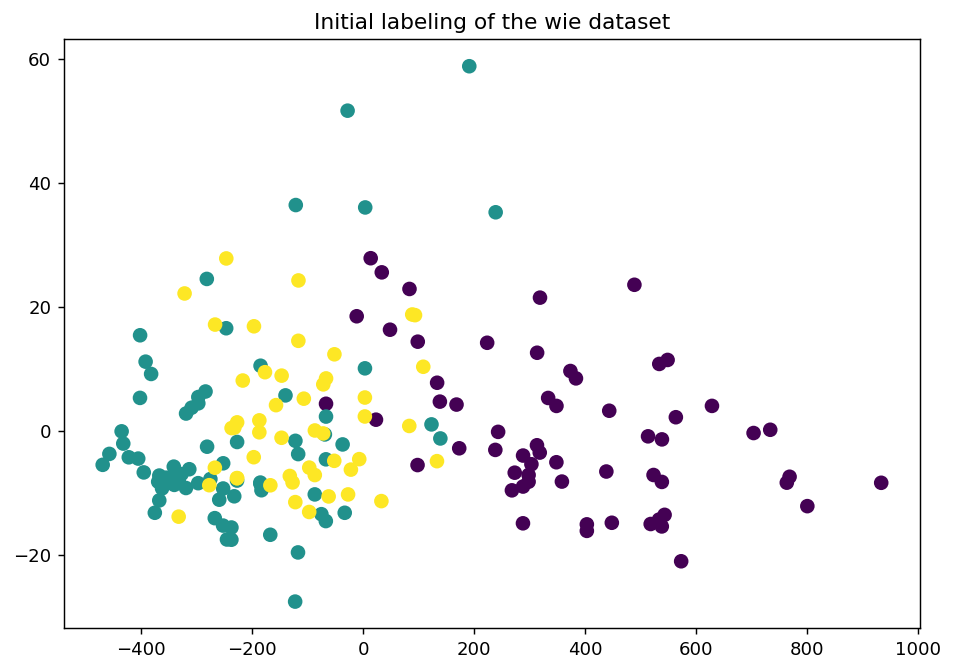

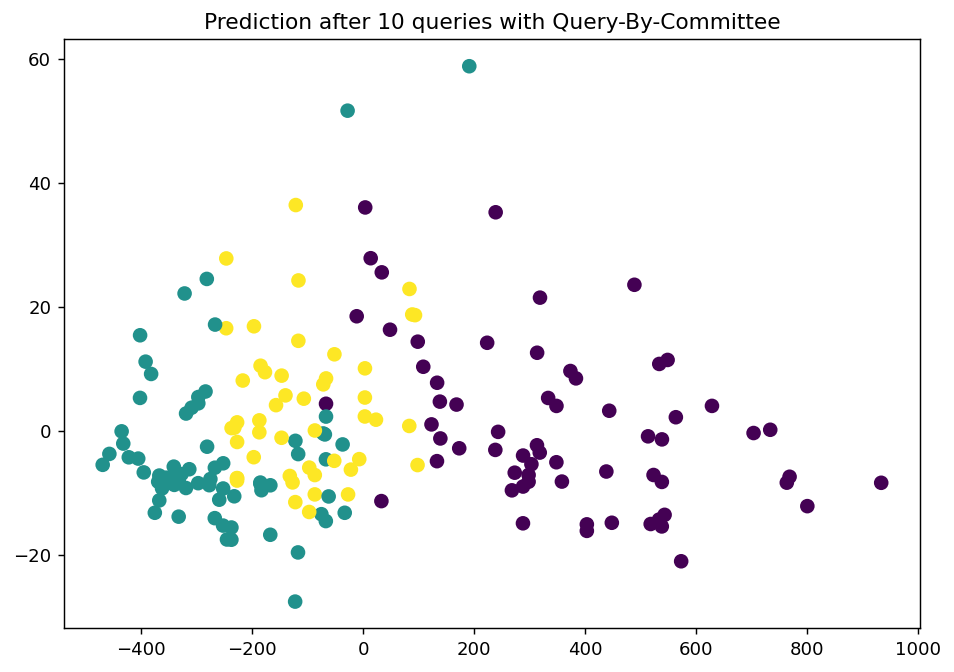

Accuracy after active learning:85.39%


In [55]:
# create a committee of three classifiers
committee = Committee(
    learner_list=[ActiveLearner(
        estimator=knn,
        X_training=X_transformed,
        y_training=y_raw1,
    ) for _ in range(3)],
)

# select the next samples to be labeled
n_queries = 20
X_pool = X_transformed
y_pool = y_raw1
for i in range(n_queries):
    query_idx, _ = committee.query(X_pool)
    committee.teach(
        X=X_pool[query_idx].reshape(1, -1),
        y=y_pool[query_idx].reshape(1, )
    )
    X_pool = np.delete(X_pool, query_idx, axis=0)
    y_pool = np.delete(y_pool, query_idx)

# plot the results
_, ax = plt.subplots(figsize=(8.5, 6), dpi=130)
ax.scatter(*X_transformed.T, c=y_raw1, s=50)
ax.set_title('Initial labeling of the wie dataset')
plt.show()

_, ax = plt.subplots(figsize=(8.5, 6), dpi=130)
prediction = committee.predict(X_transformed)
ax.scatter(*X_transformed.T, c=prediction, s=50)
ax.set_title('Prediction after 10 queries with Query-By-Committee')
plt.show()


# calculate accuracy
accuracy = accuracy_score(y_raw1, prediction)

print('Accuracy after active learning:{:.2f}%'.format(accuracy*100))


# Iris dataset with Unbalanced 

In [56]:
from sklearn.datasets import load_iris
from sklearn.utils import shuffle
from modAL.models import ActiveLearner
from modAL.uncertainty import uncertainty_sampling
import numpy as np

# Load the Iris dataset
X, y = load_iris(return_X_y=True)

# Shuffle the data
X, y = shuffle(X, y, random_state=42)

# Create an unbalanced version of the dataset by duplicating samples from the third class
class_to_duplicate = 2
class_indices = [i for i, label in enumerate(y) if label == class_to_duplicate]
num_samples_to_duplicate = 30
indices_to_duplicate = class_indices[:num_samples_to_duplicate]
X_unbalanced = np.concatenate([X, X[indices_to_duplicate]], axis=0)
y_unbalanced = np.concatenate([y, y[indices_to_duplicate]])


In [57]:
print(X_unbalanced.size)

720


In [58]:
print(y_unbalanced.size)

180


In [59]:
# Isolate our examples for our labeled dataset.
n_labeled_examples = X_raw1.shape[0]
training_indices = np.random.randint(low=0, high=n_labeled_examples + 1, size=3)

X_train = X_unbalanced[training_indices]
y_train = y_unbalanced[training_indices]

# Isolate the non-training examples we'll be querying.
X_pool = np.delete(X_unbalanced, training_indices, axis=0)
y_pool = np.delete(y_unbalanced, training_indices, axis=0)

# uncertainty_sampling

In [60]:
# Specify our core estimator along with it is active learning model.
knn = KNeighborsClassifier(n_neighbors=3)

learner = ActiveLearner(estimator=knn, query_strategy=uncertainty_sampling, X_training=X_train, y_training=y_train)

In [61]:
y_predict = learner.predict(X_unbalanced)
print(accuracy_score(y_predict , y_unbalanced))

0.2777777777777778


In [62]:
unqueried_score = learner.score(X_unbalanced, y_unbalanced)

In [63]:
N_QUERIES = 20
performance_history = [unqueried_score]

# Allow our model to query our unlabeled dataset for the most
# informative points according to our query strategy (uncertainty sampling).
for index in range(N_QUERIES):
    query_index, query_instance = learner.query(X_unbalanced)

    # Teach our ActiveLearner model the record it has requested.
    X, y = X_pool[query_index].reshape(1, -1), y_pool[query_index].reshape(1, )
    learner.teach(X=X, y=y)

    # Remove the queried instance from the unlabeled pool.
    X_pool, y_pool = np.delete(X_unbalanced, query_index, axis=0), np.delete(y_unbalanced, query_index)

    # Calculate and report our model's accuracy.
    model_accuracy = learner.score(X_unbalanced, y_unbalanced)
    print('Accuracy after query {n}: {acc:0.4f}'.format(n=index + 1, acc=model_accuracy))

    # Save our model's performance for plotting.
    performance_history.append(model_accuracy)

Accuracy after query 1: 0.2778
Accuracy after query 2: 0.2778
Accuracy after query 3: 0.5556
Accuracy after query 4: 0.5556
Accuracy after query 5: 0.5556
Accuracy after query 6: 0.5556
Accuracy after query 7: 0.5556
Accuracy after query 8: 0.5556
Accuracy after query 9: 0.5556
Accuracy after query 10: 0.5556
Accuracy after query 11: 0.5556
Accuracy after query 12: 0.5556
Accuracy after query 13: 0.5556
Accuracy after query 14: 0.5556
Accuracy after query 15: 0.5556
Accuracy after query 16: 0.5556
Accuracy after query 17: 0.5556
Accuracy after query 18: 0.5556
Accuracy after query 19: 0.5556
Accuracy after query 20: 0.5556


# Iris dataset with Unbalanced 

In [64]:
# load the iris dataset
iris = load_iris()

# shuffle the data
iris_X, iris_y = shuffle(iris.data, iris.target, random_state=42)

# create an unbalanced dataset by removing 80% of the instances from class 2
indices = np.where(iris_y != 2)[0]
np.random.shuffle(indices)
remove_indices = indices[:int(0.8*len(indices))]
X_unbalanced = np.delete(iris_X, remove_indices, axis=0)
y_unbalanced = np.delete(iris_y, remove_indices)

# print the class distribution
print("Class distribution:", np.bincount(y_unbalanced))


Class distribution: [ 8 12 50]


# entropy_sampling

In [65]:
learner = ActiveLearner(
    estimator=RandomForestClassifier(),
    query_strategy=entropy_sampling,
    X_training=X_unbalanced, y_training=y_unbalanced
)

In [66]:
y_predict = learner.predict(X_unbalanced)
print(accuracy_score(y_predict , y_unbalanced))

1.0


In [67]:
unqueried_score = learner.score(iris_X, iris_y)

In [68]:
N_QUERIES = 20
performance_history = [unqueried_score]
X_pool = X_unbalanced
y_pool = y_unbalanced

# Allow our model to query our unlabeled dataset for the most
# informative points according to our query strategy (uncertainty sampling).
for index in range(N_QUERIES):
    query_index, query_instance = learner.query(X_pool)

    # Teach our ActiveLearner model the record it has requested.
    X, y = X_pool[query_index].reshape(1, -1), y_pool[query_index].reshape(1, )
    learner.teach(X=X, y=y)

    # Remove the queried instance from the unlabeled pool.
    X_pool, y_pool = np.delete(X_pool, query_index, axis=0), np.delete(y_pool, query_index)

    # Calculate and report our model's accuracy.
    model_accuracy = learner.score(iris_X, iris_y)
    print('Accuracy after query {n}: {acc:0.4f}'.format(n=index + 1, acc=model_accuracy))

    # Save our model's performance for plotting.
    performance_history.append(model_accuracy)

Accuracy after query 1: 0.9667
Accuracy after query 2: 0.9667
Accuracy after query 3: 0.9533
Accuracy after query 4: 0.9667
Accuracy after query 5: 0.9667
Accuracy after query 6: 0.9667
Accuracy after query 7: 0.9600
Accuracy after query 8: 0.9667
Accuracy after query 9: 0.9667
Accuracy after query 10: 0.9667
Accuracy after query 11: 0.9533
Accuracy after query 12: 0.9667
Accuracy after query 13: 0.9667
Accuracy after query 14: 0.9533
Accuracy after query 15: 0.9667
Accuracy after query 16: 0.9667
Accuracy after query 17: 0.9533
Accuracy after query 18: 0.9533
Accuracy after query 19: 0.9667
Accuracy after query 20: 0.9667


# uncertainty_sampling

In [69]:
# Specify our core estimator along with it is active learning model.
knn = KNeighborsClassifier(n_neighbors=3)

learner = ActiveLearner(estimator=knn, query_strategy=uncertainty_sampling, X_training=X_unbalanced, y_training=y_unbalanced)

In [70]:
y_predict = learner.predict(X_unbalanced)
print(accuracy_score(y_predict , y_unbalanced))

1.0


In [71]:
unqueried_score = learner.score(iris_X, iris_y)

In [72]:
N_QUERIES = 20
performance_history = [unqueried_score]
X_pool = X_unbalanced
y_pool = y_unbalanced

# Allow our model to query our unlabeled dataset for the most
# informative points according to our query strategy (uncertainty sampling).
for index in range(N_QUERIES):
    query_index, query_instance = learner.query(X_pool)

    # Teach our ActiveLearner model the record it has requested.
    X, y = X_pool[query_index].reshape(1, -1), y_pool[query_index].reshape(1, )
    learner.teach(X=X, y=y)

    # Remove the queried instance from the unlabeled pool.
    X_pool, y_pool = np.delete(X_pool, query_index, axis=0), np.delete(y_pool, query_index)

    # Calculate and report our model's accuracy.
    model_accuracy = learner.score(iris_X, iris_y)
    print('Accuracy after query {n}: {acc:0.4f}'.format(n=index + 1, acc=model_accuracy))

    # Save our model's performance for plotting.
    performance_history.append(model_accuracy)

Accuracy after query 1: 0.9600
Accuracy after query 2: 0.9533
Accuracy after query 3: 0.9600
Accuracy after query 4: 0.9600
Accuracy after query 5: 0.9600
Accuracy after query 6: 0.9667
Accuracy after query 7: 0.9667
Accuracy after query 8: 0.9667
Accuracy after query 9: 0.9667
Accuracy after query 10: 0.9667
Accuracy after query 11: 0.9667
Accuracy after query 12: 0.9667
Accuracy after query 13: 0.9667
Accuracy after query 14: 0.9667
Accuracy after query 15: 0.9667
Accuracy after query 16: 0.9667
Accuracy after query 17: 0.9667
Accuracy after query 18: 0.9667
Accuracy after query 19: 0.9667
Accuracy after query 20: 0.9667


# Random Sampling 

In [73]:
def random_sampling(classifier, X_pool):
    n_samples = len(X_pool)
    query_idx = np.random.choice(range(n_samples))
    return query_idx, X_pool[query_idx]

learner = ActiveLearner(
    estimator=RandomForestClassifier(),
    query_strategy=random_sampling,
    X_training=X_unbalanced, y_training=y_unbalanced
)

In [74]:
y_predict = learner.predict(X_unbalanced)
print(accuracy_score(y_predict , y_unbalanced))

1.0


In [75]:
unqueried_score = learner.score(iris_X, iris_y)

In [76]:
N_QUERIES = 20
performance_history = [unqueried_score]
X_pool = X_unbalanced
y_pool = y_unbalanced

# Allow our model to query our unlabeled dataset for the most
# informative points according to our query strategy (uncertainty sampling).
for index in range(N_QUERIES):
    query_index, query_instance = learner.query(X_pool)

    # Teach our ActiveLearner model the record it has requested.
    X, y = X_pool[query_index].reshape(1, -1), y_pool[query_index].reshape(1, )
    learner.teach(X=X, y=y)

    # Remove the queried instance from the unlabeled pool.
    X_pool, y_pool = np.delete(X_pool, query_index, axis=0), np.delete(y_pool, query_index)

    # Calculate and report our model's accuracy.
    model_accuracy = learner.score(iris_X, iris_y)
    print('Accuracy after query {n}: {acc:0.4f}'.format(n=index + 1, acc=model_accuracy))

    # Save our model's performance for plotting.
    performance_history.append(model_accuracy)

Accuracy after query 1: 0.9667
Accuracy after query 2: 0.9667
Accuracy after query 3: 0.9667
Accuracy after query 4: 0.9667
Accuracy after query 5: 0.9667
Accuracy after query 6: 0.9600
Accuracy after query 7: 0.9667
Accuracy after query 8: 0.9667
Accuracy after query 9: 0.9667
Accuracy after query 10: 0.9667
Accuracy after query 11: 0.9667
Accuracy after query 12: 0.9667
Accuracy after query 13: 0.9600
Accuracy after query 14: 0.9667
Accuracy after query 15: 0.9600
Accuracy after query 16: 0.9667
Accuracy after query 17: 0.9667
Accuracy after query 18: 0.9667
Accuracy after query 19: 0.9667
Accuracy after query 20: 0.9667


# margin_sampling

In [77]:
learner = ActiveLearner(
    estimator=RandomForestClassifier(),
    query_strategy=margin_sampling,
    X_training=X_unbalanced, y_training=y_unbalanced
)

In [78]:
y_predict = learner.predict(X_unbalanced)
print(accuracy_score(y_predict , y_unbalanced))

1.0


In [79]:
unqueried_score = learner.score(iris_X, iris_y)

In [80]:
N_QUERIES = 20
performance_history = [unqueried_score]
X_pool = X_unbalanced
y_pool = y_unbalanced

# Allow our model to query our unlabeled dataset for the most
# informative points according to our query strategy (uncertainty sampling).
for index in range(N_QUERIES):
    query_index, query_instance = learner.query(X_pool)

    # Teach our ActiveLearner model the record it has requested.
    X, y = X_pool[query_index].reshape(1, -1), y_pool[query_index].reshape(1, )
    learner.teach(X=X, y=y)

    # Remove the queried instance from the unlabeled pool.
    X_pool, y_pool = np.delete(X_pool, query_index, axis=0), np.delete(y_pool, query_index)

    # Calculate and report our model's accuracy.
    model_accuracy = learner.score(iris_X, iris_y)
    print('Accuracy after query {n}: {acc:0.4f}'.format(n=index + 1, acc=model_accuracy))

    # Save our model's performance for plotting.
    performance_history.append(model_accuracy)

Accuracy after query 1: 0.9600
Accuracy after query 2: 0.9667
Accuracy after query 3: 0.9667
Accuracy after query 4: 0.9667
Accuracy after query 5: 0.9667
Accuracy after query 6: 0.9667
Accuracy after query 7: 0.9667
Accuracy after query 8: 0.9667
Accuracy after query 9: 0.9667
Accuracy after query 10: 0.9667
Accuracy after query 11: 0.9667
Accuracy after query 12: 0.9533
Accuracy after query 13: 0.9533
Accuracy after query 14: 0.9533
Accuracy after query 15: 0.9533
Accuracy after query 16: 0.9667
Accuracy after query 17: 0.9667
Accuracy after query 18: 0.9667
Accuracy after query 19: 0.9533
Accuracy after query 20: 0.9667
